In [1]:
from google.colab import drive # mounts the google drive for a new notebook 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# load the 2 npy files created by the process_yale_images.ipynb 
from numpy import load
import numpy as np
path = '/content/drive/My Drive/'
# load array
y = load(path + 'yaleExtB_target.npy')
X = load(path + 'yaleExtB_data.npy')
print(X.shape)
print(y.shape)

(1500, 5236)
(1500,)


In [3]:
from sklearn.model_selection import train_test_split # loads functions from the ML library sklearn 
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [79]:
# PCA 
nof_prin_components = 200  # PARAMETER for optimisation in expereiments
pca = PCA(n_components=nof_prin_components, whiten=True).fit(X)
# applies PCA to the train and test images to calculate the principal components
X_train_pca = pca.transform(X) 
print(X_train_pca.shape)


(1500, 200)


In [102]:
# train a neural network
nohn = 300 # nof hidden neurons
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(nohn,), solver='adam', activation='relu', batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y)

Fitting the classifier to the training set
Iteration 1, loss = 3.54809615
Validation score: 0.173333
Iteration 2, loss = 2.73890836
Validation score: 0.433333
Iteration 3, loss = 2.08952796
Validation score: 0.586667
Iteration 4, loss = 1.53890228
Validation score: 0.746667
Iteration 5, loss = 1.09329283
Validation score: 0.826667
Iteration 6, loss = 0.76238729
Validation score: 0.873333
Iteration 7, loss = 0.53275752
Validation score: 0.886667
Iteration 8, loss = 0.38005393
Validation score: 0.900000
Iteration 9, loss = 0.27958627
Validation score: 0.920000
Iteration 10, loss = 0.21454585
Validation score: 0.926667
Iteration 11, loss = 0.16883348
Validation score: 0.940000
Iteration 12, loss = 0.13738209
Validation score: 0.940000
Iteration 13, loss = 0.11441708
Validation score: 0.940000
Iteration 14, loss = 0.09732027
Validation score: 0.940000
Iteration 15, loss = 0.08413507
Validation score: 0.946667
Iteration 16, loss = 0.07423314
Validation score: 0.946667
Iteration 17, loss = 0

In [103]:

from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Set the number of folds for cross-validation
k = 5

# Store the accuracy scores for each fold
data = KFold(n_splits=5)
for train_index,validation_index in data.split(X_train_pca):
  X_train2, X_validation=X_train_pca[train_index],X_train_pca[validation_index]
  y_train2,y_validation=y[train_index],y[validation_index]

# Print the accuracy scores for each fold
score = cross_val_score(clf, X_train_pca, y, cv=k, scoring='accuracy')
print("Cross-validation score:", score)

# Print the mean accuracy score across all folds
print("Mean accuracy score:", score.mean())


# print the accuracy score for the training set
train_score = clf.score(X_train2, y_train2)
print("Training set accuracy score:", train_score)

# print the accuracy score for the validation set
val_score = clf.score(X_validation, y_validation)
print("Validation set accuracy score:", val_score)



Iteration 1, loss = 3.54337267
Validation score: 0.158333
Iteration 2, loss = 2.83390178
Validation score: 0.308333
Iteration 3, loss = 2.27451188
Validation score: 0.516667
Iteration 4, loss = 1.78454864
Validation score: 0.675000
Iteration 5, loss = 1.36891306
Validation score: 0.791667
Iteration 6, loss = 1.03265422
Validation score: 0.875000
Iteration 7, loss = 0.76934886
Validation score: 0.883333
Iteration 8, loss = 0.57264518
Validation score: 0.916667
Iteration 9, loss = 0.42925994
Validation score: 0.925000
Iteration 10, loss = 0.32635168
Validation score: 0.933333
Iteration 11, loss = 0.25222092
Validation score: 0.950000
Iteration 12, loss = 0.19972389
Validation score: 0.958333
Iteration 13, loss = 0.16142746
Validation score: 0.958333
Iteration 14, loss = 0.13295482
Validation score: 0.958333
Iteration 15, loss = 0.11190917
Validation score: 0.958333
Iteration 16, loss = 0.09589355
Validation score: 0.958333
Iteration 17, loss = 0.08305323
Validation score: 0.958333
Iterat

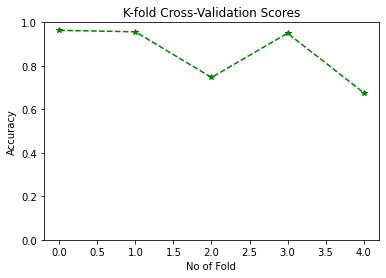

In [98]:
# plot the scores as a bar chart
import matplotlib.pyplot as plt

plt.plot(score,marker='*',linestyle="--",color="Green")
plt.xlabel('No of Fold')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('K-fold Cross-Validation Scores')
plt.show()

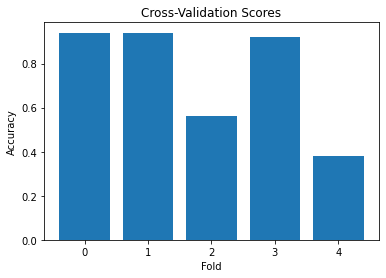

In [ ]:
# plot bar graph of cross-validation scores
plt.bar(range(k), score)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.show()

Iteration 1, loss = 3.54640770
Validation score: 0.050000
Iteration 2, loss = 3.51170601
Validation score: 0.066667
Iteration 3, loss = 3.45955821
Validation score: 0.075000
Iteration 4, loss = 3.39670069
Validation score: 0.075000
Iteration 5, loss = 3.32828899
Validation score: 0.075000
Iteration 6, loss = 3.25621686
Validation score: 0.083333
Iteration 7, loss = 3.18271950
Validation score: 0.100000
Iteration 8, loss = 3.10885528
Validation score: 0.108333
Iteration 9, loss = 3.03502897
Validation score: 0.116667
Iteration 10, loss = 2.96237472
Validation score: 0.133333
Iteration 11, loss = 2.89039169
Validation score: 0.166667
Iteration 12, loss = 2.81905303
Validation score: 0.175000
Iteration 13, loss = 2.74834384
Validation score: 0.200000
Iteration 14, loss = 2.67875005
Validation score: 0.241667
Iteration 15, loss = 2.61002005
Validation score: 0.275000
Iteration 16, loss = 2.54238524
Validation score: 0.308333
Iteration 17, loss = 2.47615412
Validation score: 0.325000
Iterat

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


Validation score: 0.416667
Iteration 6, loss = 1.16212053
Validation score: 0.416667
Iteration 7, loss = 1.11511955
Validation score: 0.416667
Iteration 8, loss = 1.06576794
Validation score: 0.500000
Iteration 9, loss = 1.01494268
Validation score: 0.500000
Iteration 10, loss = 0.96342951
Validation score: 0.500000
Iteration 11, loss = 0.91191959
Validation score: 0.583333
Iteration 12, loss = 0.86100820
Validation score: 0.583333
Iteration 13, loss = 0.81119554
Validation score: 0.583333
Iteration 14, loss = 0.76288962
Validation score: 0.666667
Iteration 15, loss = 0.71641107
Validation score: 0.666667
Iteration 16, loss = 0.67199967
Validation score: 0.666667
Iteration 17, loss = 0.62982215
Validation score: 0.666667
Iteration 18, loss = 0.58998095
Validation score: 0.750000
Iteration 19, loss = 0.55252323
Validation score: 0.750000
Iteration 20, loss = 0.51745006
Validation score: 0.750000
Iteration 21, loss = 0.48472509
Validation score: 0.750000
Iteration 22, loss = 0.45428260
V

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


Validation score: 0.250000
Iteration 8, loss = 1.89156698
Validation score: 0.250000
Iteration 9, loss = 1.85563413
Validation score: 0.250000
Iteration 10, loss = 1.81792742
Validation score: 0.250000
Iteration 11, loss = 1.77876687
Validation score: 0.250000
Iteration 12, loss = 1.73844494
Validation score: 0.250000
Iteration 13, loss = 1.69722835
Validation score: 0.291667
Iteration 14, loss = 1.65535989
Validation score: 0.291667
Iteration 15, loss = 1.61306000
Validation score: 0.333333
Iteration 16, loss = 1.57052830
Validation score: 0.333333
Iteration 17, loss = 1.52794494
Validation score: 0.333333
Iteration 18, loss = 1.48547191
Validation score: 0.333333
Iteration 19, loss = 1.44325426
Validation score: 0.333333
Iteration 20, loss = 1.40142115
Validation score: 0.333333
Iteration 21, loss = 1.36008692
Validation score: 0.333333
Iteration 22, loss = 1.31935205
Validation score: 0.333333
Iteration 23, loss = 1.27930410
Validation score: 0.333333
Iteration 24, loss = 1.24001856

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


Validation score: 0.083333
Iteration 4, loss = 1.24264506
Validation score: 0.083333
Iteration 5, loss = 1.20040882
Validation score: 0.083333
Iteration 6, loss = 1.15377648
Validation score: 0.083333
Iteration 7, loss = 1.10395146
Validation score: 0.083333
Iteration 8, loss = 1.05203442
Validation score: 0.166667
Iteration 9, loss = 0.99901010
Validation score: 0.250000
Iteration 10, loss = 0.94573838
Validation score: 0.416667
Iteration 11, loss = 0.89294993
Validation score: 0.416667
Iteration 12, loss = 0.84124700
Validation score: 0.416667
Iteration 13, loss = 0.79110873
Validation score: 0.416667
Iteration 14, loss = 0.74290043
Validation score: 0.416667
Iteration 15, loss = 0.69688558
Validation score: 0.416667
Iteration 16, loss = 0.65323921
Validation score: 0.500000
Iteration 17, loss = 0.61206167
Validation score: 0.500000
Iteration 18, loss = 0.57339181
Validation score: 0.500000
Iteration 19, loss = 0.53721910
Validation score: 0.500000
Iteration 20, loss = 0.50349436
Val

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


Iteration 11, loss = 1.82135550
Validation score: 0.208333
Iteration 12, loss = 1.77719730
Validation score: 0.208333
Iteration 13, loss = 1.73220379
Validation score: 0.208333
Iteration 14, loss = 1.68665631
Validation score: 0.208333
Iteration 15, loss = 1.64080920
Validation score: 0.208333
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.49702972
Validation score: 0.111111
Iteration 2, loss = 2.47451511
Validation score: 0.138889
Iteration 3, loss = 2.43935878
Validation score: 0.138889
Iteration 4, loss = 2.39405887
Validation score: 0.166667
Iteration 5, loss = 2.34134857
Validation score: 0.166667
Iteration 6, loss = 2.28207953
Validation score: 0.222222
Iteration 7, loss = 2.21927797
Validation score: 0.222222
Iteration 8, loss = 2.15321679
Validation score: 0.222222
Iteration 9, loss = 2.08488836
Validation score: 0.250000
Iteration 10, loss = 2.01544899
Validation score: 0.277778
Iteration 11, loss = 1.94543931

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


Iteration 14, loss = 0.60928410
Validation score: 0.750000
Iteration 15, loss = 0.56247447
Validation score: 0.916667
Iteration 16, loss = 0.51919199
Validation score: 0.916667
Iteration 17, loss = 0.47942195
Validation score: 0.916667
Iteration 18, loss = 0.44306418
Validation score: 0.916667
Iteration 19, loss = 0.40995734
Validation score: 0.916667
Iteration 20, loss = 0.37990020
Validation score: 0.916667
Iteration 21, loss = 0.35266903
Validation score: 0.916667
Iteration 22, loss = 0.32803119
Validation score: 0.916667
Iteration 23, loss = 0.30575514
Validation score: 0.916667
Iteration 24, loss = 0.28561733
Validation score: 0.916667
Iteration 25, loss = 0.26740672
Validation score: 0.916667
Iteration 26, loss = 0.25092734
Validation score: 0.916667
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.00308912
Validation score: 0.208333
Iteration 2, loss = 1.98951659
Validation score: 0.250000


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


Iteration 3, loss = 1.97026655
Validation score: 0.250000
Iteration 4, loss = 1.94601887
Validation score: 0.250000
Iteration 5, loss = 1.91740864
Validation score: 0.333333
Iteration 6, loss = 1.88502712
Validation score: 0.333333
Iteration 7, loss = 1.84942310
Validation score: 0.333333
Iteration 8, loss = 1.81110464
Validation score: 0.333333
Iteration 9, loss = 1.77054087
Validation score: 0.333333
Iteration 10, loss = 1.72816380
Validation score: 0.333333
Iteration 11, loss = 1.68437009
Validation score: 0.333333
Iteration 12, loss = 1.63952267
Validation score: 0.416667
Iteration 13, loss = 1.59395233
Validation score: 0.416667
Iteration 14, loss = 1.54795916
Validation score: 0.458333
Iteration 15, loss = 1.50181390
Validation score: 0.458333
Iteration 16, loss = 1.45575924
Validation score: 0.500000
Iteration 17, loss = 1.41001108
Validation score: 0.541667
Iteration 18, loss = 1.36475981
Validation score: 0.541667
Iteration 19, loss = 1.32017150
Validation score: 0.541667
Iter

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


Iteration 6, loss = 1.15209511
Validation score: 0.416667
Iteration 7, loss = 1.10548299
Validation score: 0.416667
Iteration 8, loss = 1.05659678
Validation score: 0.416667
Iteration 9, loss = 1.00631168
Validation score: 0.416667
Iteration 10, loss = 0.95540818
Validation score: 0.500000
Iteration 11, loss = 0.90456893
Validation score: 0.500000
Iteration 12, loss = 0.85437777
Validation score: 0.500000
Iteration 13, loss = 0.80532111
Validation score: 0.583333
Iteration 14, loss = 0.75779143
Validation score: 0.583333
Iteration 15, loss = 0.71209288
Validation score: 0.583333
Iteration 16, loss = 0.66844853
Validation score: 0.583333
Iteration 17, loss = 0.62700897
Validation score: 0.583333
Iteration 18, loss = 0.58786175
Validation score: 0.750000
Iteration 19, loss = 0.55104108
Validation score: 0.833333
Iteration 20, loss = 0.51653744
Validation score: 0.833333
Iteration 21, loss = 0.48430670
Validation score: 0.916667
Iteration 22, loss = 0.45427825
Validation score: 0.916667
I

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


Iteration 3, loss = 2.13966475
Validation score: 0.083333
Iteration 4, loss = 2.11814706
Validation score: 0.083333
Iteration 5, loss = 2.09269303
Validation score: 0.083333
Iteration 6, loss = 2.06379521
Validation score: 0.083333
Iteration 7, loss = 2.03190729
Validation score: 0.083333
Iteration 8, loss = 1.99744640
Validation score: 0.083333
Iteration 9, loss = 1.96079544
Validation score: 0.083333
Iteration 10, loss = 1.92230533
Validation score: 0.083333
Iteration 11, loss = 1.88229722
Validation score: 0.083333
Iteration 12, loss = 1.84106452
Validation score: 0.083333
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.33869425
Validation score: 0.055556
Iteration 2, loss = 2.31831349
Validation score: 0.055556
Iteration 3, loss = 2.28628029
Validation score: 0.055556
Iteration 4, loss = 2.24508244
Validation score: 0.055556
Iteration 5, loss = 2.19711412
Validation score: 0.055556
Iteration 6, loss = 2.14313669
Val

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


Iteration 1, loss = 1.32435131
Validation score: 0.416667
Iteration 2, loss = 1.30238924
Validation score: 0.416667
Iteration 3, loss = 1.27160260
Validation score: 0.416667
Iteration 4, loss = 1.23342059
Validation score: 0.500000
Iteration 5, loss = 1.18923063
Validation score: 0.583333
Iteration 6, loss = 1.14035723
Validation score: 0.583333
Iteration 7, loss = 1.08804495
Validation score: 0.583333
Iteration 8, loss = 1.03344420
Validation score: 0.583333
Iteration 9, loss = 0.97759963
Validation score: 0.583333
Iteration 10, loss = 0.92144113
Validation score: 0.583333
Iteration 11, loss = 0.86577734
Validation score: 0.583333
Iteration 12, loss = 0.81129234
Validation score: 0.583333
Iteration 13, loss = 0.75854543
Validation score: 0.666667
Iteration 14, loss = 0.70797431
Validation score: 0.666667
Iteration 15, loss = 0.65990150
Validation score: 0.666667
Iteration 16, loss = 0.61454371
Validation score: 0.750000
Iteration 17, loss = 0.57202358
Validation score: 0.750000
Iterat

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


Iteration 5, loss = 1.90445561
Validation score: 0.291667
Iteration 6, loss = 1.87194020
Validation score: 0.291667
Iteration 7, loss = 1.83621490
Validation score: 0.291667
Iteration 8, loss = 1.79779706
Validation score: 0.333333
Iteration 9, loss = 1.75716430
Validation score: 0.375000
Iteration 10, loss = 1.71475608
Validation score: 0.375000
Iteration 11, loss = 1.67097537
Validation score: 0.416667
Iteration 12, loss = 1.62619016
Validation score: 0.416667
Iteration 13, loss = 1.58073493
Validation score: 0.416667
Iteration 14, loss = 1.53491209
Validation score: 0.416667
Iteration 15, loss = 1.48899325
Validation score: 0.416667
Iteration 16, loss = 1.44322060
Validation score: 0.416667
Iteration 17, loss = 1.39780814
Validation score: 0.500000
Iteration 18, loss = 1.35294310
Validation score: 0.500000
Iteration 19, loss = 1.30878721
Validation score: 0.541667
Iteration 20, loss = 1.26547821
Validation score: 0.541667
Iteration 21, loss = 1.22313132
Validation score: 0.625000
It

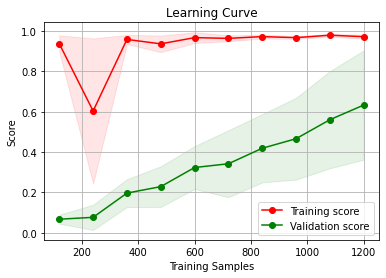

Fold: 5 - Train score: 0.985 - Validation score: 0.000
Mean train score: 0.978 - Mean validation score: 0.000


In [ ]:
from sklearn.model_selection import learning_curve

# Split the data into training and validation sets using KFold cross-validation
k = 5
kf = KFold(n_splits=k)

# Store the training and validation accuracy scores for each fold
train_scores = []
val_scores = []

for train_index, val_index in kf.split(X_train_pca):
    # Split the data into training and validation sets
    X_train, X_val = X_train_pca[train_index], X_train_pca[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Fit the classifier to the training data
    clf.fit(X_train, y_train)
    
    # Compute the accuracy scores on the training and validation data
    train_score = clf.score(X_train, y_train)
    val_score = clf.score(X_val, y_val)
    
    # Store the scores
    train_scores.append(train_score)
    val_scores.append(val_score)
    
    print(f"Fold: {len(train_scores)} - Train score: {train_score:.3f} - Validation score: {val_score:.3f}")

# Compute the mean accuracy scores across all folds
mean_train_score = np.mean(train_scores)
mean_val_score = np.mean(val_scores)

print(f"Mean train score: {mean_train_score:.3f} - Mean validation score: {mean_val_score:.3f}")

# Plot the learning curve
train_sizes, train_scores_lc, val_scores_lc = learning_curve(clf, X_train_pca, y, cv=k, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
train_scores_mean = np.mean(train_scores_lc, axis=1)
train_scores_std = np.std(train_scores_lc, axis=1)
val_scores_mean = np.mean(val_scores_lc, axis=1)
val_scores_std = np.std(val_scores_lc, axis=1)

plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Samples')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation score')
plt.legend(loc='best')
plt.show()


print(f"Fold: {len(train_scores)} - Train score: {train_score:.3f} - Validation score: {val_score:.3f}")
print(f"Mean train score: {mean_train_score:.3f} - Mean validation score: {mean_val_score:.3f}")
